In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import tempfile

from sklearn import svm, metrics
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import random


<type 'numpy.ndarray'>


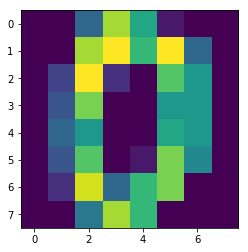

array([[ 0.],
       [ 0.],
       [ 5.],
       [13.],
       [ 9.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [13.],
       [15.],
       [10.],
       [15.],
       [ 5.],
       [ 0.],
       [ 0.],
       [ 3.],
       [15.],
       [ 2.],
       [ 0.],
       [11.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 4.],
       [12.],
       [ 0.],
       [ 0.],
       [ 8.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 5.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 9.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 4.],
       [11.],
       [ 0.],
       [ 1.],
       [12.],
       [ 7.],
       [ 0.],
       [ 0.],
       [ 2.],
       [14.],
       [ 5.],
       [10.],
       [12.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 6.],
       [13.],
       [10.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [7]:
from sklearn import datasets
digits = datasets.load_digits()
example_image = digits.images[0]
print type(example_image)
plt.imshow(example_image); plt.show()
example_image.reshape((8*8,1))

In [2]:
data_dir = '/tmp/tensorflow/mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz

In [3]:
from sklearn.externals import joblib
clf = joblib.load('../models_examples/sk_mnist/train/data/models/mnist_svm_0_0/SVM.pkl')

(55000, 784)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[7 3 4 ... 5 6 8]


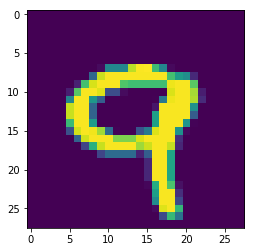

In [14]:
# now we load and examine the data
train_data=mnist.train.images
print train_data.shape
n_samples = train_data.shape[0]

train_labels=np.array(np.where(mnist.train.labels==1))[1]
print mnist.train.labels
print train_labels
plt.imshow(train_data[1234].reshape((28,28))); plt.show()

In [15]:
# create a classifier - support vector classifier

classifier = svm.SVC(gamma=0.001)
classifier.fit(train_data, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
test_data=mnist.test.images
test_labels=np.array(np.where(mnist.test.labels==1))[1]

expected = test_labels
predicted = clf.predict(test_data)

classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False): 
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       980
          1       0.96      0.99      0.97      1135
          2       0.94      0.92      0.93      1032
          3       0.92      0.94      0.93      1010
          4       0.92      0.95      0.94       982
          5       0.93      0.90      0.91       892
          6       0.94      0.96      0.95       958
          7       0.95      0.93      0.94      1028
          8       0.93      0.91      0.92       974
          9       0.94      0.91      0.92      1009

avg / total       0.94      0.94      0.94     10000


confusion matrix: 
[[ 967    0    1    0    0    5    5    1    1    0]
 [   0 1118    2    3    

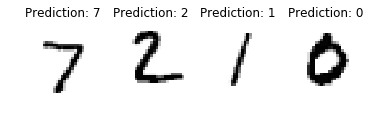

In [7]:
classifier = clf
print("classification report for classifier %s: \n%s\n" % (classifier, metrics.classification_report(expected, predicted)))
print("confusion matrix: \n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(test_data, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2,4, index + 5)
    plt.axis('off')
    plt.imshow(image.reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()
    

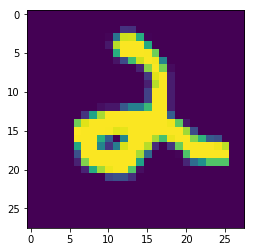

[2]


In [28]:
test_index = random.randint(0, test_data.shape[0]-1)
plt.imshow(test_data[test_index].reshape((28,28))); plt.show()
test_samples = test_data[test_index].reshape((1,784))
predicted = clf.predict(test_samples)
print(predicted)

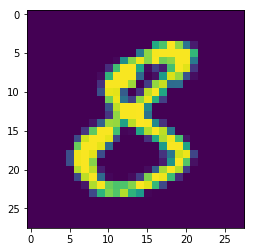

In [8]:
plt.imshow(test_data[1234].reshape((28,28))); plt.show()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


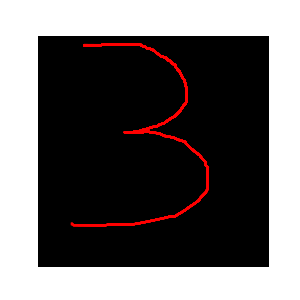

In [67]:
# let's test our model on images we draw ourselves!

from matplotlib.lines import Line2D
%pylab notebook
#This is needed for plot widgets

class Annotator(object):
    def __init__(self, axes):
        self.axes = axes
        self.xdata = []
        self.ydata = []
        self.xy = []
        self.drawon = False
            
    def mouse_move(self, event):
        if not event.inaxes:
            return
        x, y = event.xdata, event.ydata
        if self.drawon:
            self.xdata.append(x)
            self.ydata.append(y)
            self.xy.append((int(x),int(y)))
            line = Line2D(self.xdata,self.ydata)
            line.set_color('r')
            self.axes.add_line(line)
            plt.draw()
            
    def mouse_release(self, event):
        self.xdata = []
        self.ydata = []
        self.drawon = False
        
    def mouse_press(self, event):
        self.drawon = True
        
img = np.zeros((28,28,3), dtype='uint8')
fig, axes = plt.subplots(figsize=(3,3))
axes.imshow(img)
plt.axis('off')
plt.gray()
annotator = Annotator(axes)
plt.connect('motion_notify_event', annotator.mouse_move)
plt.connect('button_release_event', annotator.mouse_release)
plt.connect('button_press_event', annotator.mouse_press)

axes.plot()
plt.show()

        
        
        
        

[3]
[[3]]
SVM prediction:  [3]


<IPython.core.display.Javascript object>


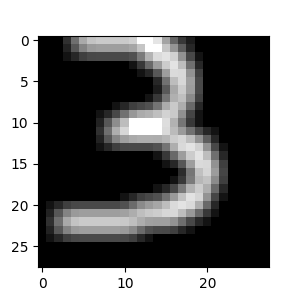

In [68]:
digimg = np.zeros((28,28,3), dtype='uint8')
for ind, points in enumerate(annotator.xy[:-1]):
    digimg=cv2.line(digimg, annotator.xy[ind], annotator.xy[ind+1], (255,0,0), 1)
digimg = cv2.GaussianBlur(digimg,(5,5),1.0)
digimg = (digimg.astype('float')*1.0/np.amax(digimg)).astype('float')[:,:,0]
digimg **= 0.5; digimg[digimg>0.9]=1.0

# the model is expecting the input in a particular format
testim = digimg.reshape((-1,28*28))

prediction = classifier.predict(testim)
print prediction
print prediction.reshape(1,-1)

print "SVM prediction: ", prediction
outimg = testim.reshape((28,28))
figure(figsize=(3,3)); imshow(outimg);
